In [12]:
# Access Libraries 
import numpy as np 
import scipy as sp
import pandas as pd 
import seaborn as sb 

import matplotlib.pyplot as plt
import sklearn 

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [13]:
# Allow visualizations 
%matplotlib inline 
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

# Goal: Create prediction models for survival on Titanic

In [14]:
testData = pd.read_csv("C:\\Users\\loret\\Desktop\\DataSciencePrep\\Kaggle\\Titanic\\test.csv")
testData.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
testData.shape

(418, 11)

In [40]:
# Drop useless columns with a lot of nulls
# testData = testData.drop(['Cabin', 'Fare', 'Ticket', 'Name'], 1)
testData.head(50)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,24.0,0,0,Q
1,893,3,female,24.0,1,0,S
2,894,2,male,26.5,0,0,Q
3,895,3,male,24.0,0,0,S
4,896,3,female,24.0,1,1,S
5,897,3,male,24.0,0,0,S
6,898,3,female,24.0,0,0,Q
7,899,2,male,26.5,1,1,S
8,900,3,female,24.0,0,0,C
9,901,3,male,24.0,2,0,S


### Create Function to Replace Nulls in Age

In [25]:
testData['Age'].groupby(testData['Pclass']).describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,98.0,40.918367,13.956799,6.00,30.0,42.0,50.75,76.0
2,88.0,28.777500,12.943458,0.92,21.0,26.5,35.25,63.0
3,146.0,24.027945,10.537105,0.17,18.5,24.0,29.75,60.5


In [33]:
# Make replacements for null values using the median
def approx_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 26.5 
        else:
            return 24 
    else: 
        return Age 

In [34]:
# Apply function
testData['Age'] = testData[['Age', 'Pclass']].apply(approx_age, axis=1)

In [35]:
# Check to see if nulls still there 
# Note: after fixing function, nulls no longer there 
testData['Age']

0      24.0
1      24.0
2      26.5
3      24.0
4      24.0
5      24.0
6      24.0
7      26.5
8      24.0
9      24.0
10     24.0
11     42.0
12     42.0
13     26.5
14     42.0
15     26.5
16     26.5
17     24.0
18     24.0
19     24.0
20     42.0
21     24.0
22     42.0
23     42.0
24     42.0
25     24.0
26     42.0
27     24.0
28     42.0
29     24.0
       ... 
388    24.0
389    24.0
390    42.0
391    42.0
392    24.0
393    26.5
394    24.0
395    42.0
396    24.0
397    42.0
398    24.0
399    24.0
400    42.0
401    26.5
402    42.0
403    42.0
404    42.0
405    26.5
406    26.5
407    42.0
408    24.0
409    24.0
410    24.0
411    42.0
412    24.0
413    24.0
414    42.0
415    24.0
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64

In [36]:
testData.isnull().any() # No nulls now! 

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Embarked       False
dtype: bool

In [37]:
# double check nulls in age colum
testData['Age'].isnull().sum()

0

### Swap Categorical Variables with Dummy Indicators

In [42]:
# Change embarked and pclass from categorical to 0/1 dummy indicators
sex = pd.get_dummies(testData['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [44]:
embark = pd.get_dummies(testData['Embarked'], drop_first=True)
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [45]:
testData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,24.0,0,0,Q
1,893,3,female,24.0,1,0,S
2,894,2,male,26.5,0,0,Q
3,895,3,male,24.0,0,0,S
4,896,3,female,24.0,1,1,S


In [46]:
len(testData)

418

### Drop & Swap

In [53]:
tDatadummy = testData.drop(['Sex','Embarked'], 1)


In [54]:
tDatadummy.head()



,PassengerId,Pclass,Age,SibSp,Parch
0,892,3,24.0,0,0
1,893,3,24.0,1,0
2,894,2,26.5,0,0
3,895,3,24.0,0,0
4,896,3,24.0,1,1


In [55]:
tData = pd.concat([tDatadummy, sex,embark], axis=1)

In [56]:
tData.head()

,PassengerId,Pclass,Age,SibSp,Parch,male,Q,S
0,892,3,24.0,0,0,1,1,0
1,893,3,24.0,1,0,0,0,1
2,894,2,26.5,0,0,1,1,0
3,895,3,24.0,0,0,1,0,1
4,896,3,24.0,1,1,0,0,1


In [57]:
len(tData)

418

### Test for Independence 

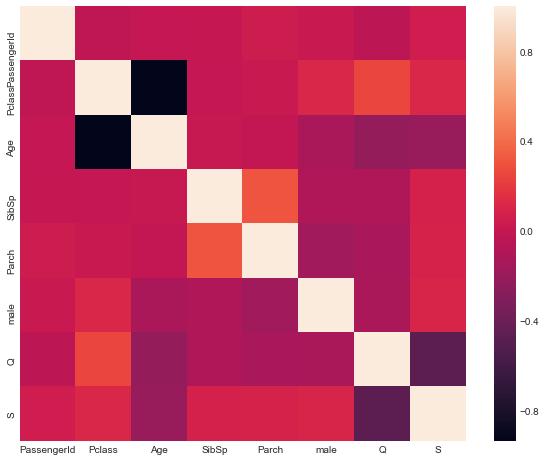

In [60]:
sb.heatmap(tData.corr())
# Age & Pclass are highly correlated, don't including in logistic regression

## Run Logistic Regression

In [59]:
tData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(1), int64(4), uint8(3)
memory usage: 17.6 KB


In [68]:
x = tData.ix[:,(2,3,4,5)].values
y = tData.ix[:,0].values 

C:\Users\loret\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [69]:
# Define models = split dataset, set size
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)

### Deploy & Evaluate Model

In [70]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
# run logistic regression and predict 
y_pred = LogReg.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
# Classification report 
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        898       0.00      0.00      0.00         1
        901       0.00      0.00      0.00         1
        903       0.00      0.00      0.00         0
        904       0.00      0.00      0.00         1
        910       0.00      0.00      0.00         1
        911       0.00      0.00      0.00         1
        912       0.00      0.00      0.00         0
        914       0.00      0.00      0.00         0
        915       0.00      0.00      0.00         1
        916       0.00      0.00      0.00         1
        920       0.00      0.00      0.00         1
        925       0.00      0.00      0.00         1
        929       0.00      0.00      0.00         1
        930       0.00      0.00      0.00         1
        931       0.00      0.00      0.00         1
        937       0.00      0.00      0.00         1
        940       0.00      0.00      0.00         1
        945       0.00      0.00      0.00   

C:\Users\loret\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\loret\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Implement Model